# 요인 분석 진행

요인분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법이다.

다른 말로 하면, 요인분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법이다. 

또 다른 말로 하면, 많은 변수로 구성된 데이터가 몇 개의 요인에 의해 영향을 받는가를 알아보는 것이라고도 할 수 있다.

<요인분석방법>

요인분석방법은 자료의 총분산을 구성하는 요소 중 어느 부분을 사용하느냐에 따라 다음과 같은 두 가지로 구성됩니다.

① 주성분분석(principle component analysis) : 원래의 변수들의 분산 중 가급적 많은 부분을 설명하는 소수의 요인을 추출하는데 목적이 있고, 공통분산이 크다는 사실을 아는 경우에 적절합니다. 주성분분석의 경우 상관행렬의 대각선에 1이 사용되는데 이는 모든 분산이 공유된다는 것을 의미합니다.

② 공통요인분석(common factor analysis) : 원래 변수들의 토대가 되는 잠재차원들을 찾아내고, 분산의 구성에 대한 사전지식이 별로 없는 경우에 적절합니다.


In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../data/Paris/listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")


# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


In [229]:

# 수용인원수 이상치 처리 (숙소 유형별 처리)
accommodates_type_list = df['숙소_유형'].unique().tolist()

def delete_outlier_IQR_InnerFence(column_name):
    # 전역 변수 선언
    global df
    # 숙소 유형별 Inner Fencs Out Lier 제거
    for type in accommodates_type_list:
        condition_room_type = df['숙소_유형'] == type
        Q1 = df[column_name][condition_room_type].quantile(.25)
        Q3 = df[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = df[column_name][condition_room_type] > (Q3 + IQR * 1.5)
        accommodates_upper_outliers = df[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        df = df.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {df.shape[0]}개')

delete_outlier_IQR_InnerFence('수용_인원수')
print("-" * 60)

# 침실수 이상치 처리
delete_outlier_IQR_InnerFence('침실수')
print("-" * 60)

# 침대수 이상치 처리
delete_outlier_IQR_InnerFence('침대수')
print("-" * 60)

# 욕실수 이상치 처리
delete_outlier_IQR_InnerFence('욕실수')
print("-" * 60)



# 가격 이상치 처리 (숙소 유형별 처리)

accommodates_type_list = df['숙소_유형'].unique().tolist()

def delete_outlier_IQR_OuterFence(column_name):
    # 전역 변수 선언
    global df
    # 숙소 유형별 Outer Fencs Out Lier 제거
    for type in accommodates_type_list:
        condition_room_type = df['숙소_유형'] == type
        Q1 = df[column_name][condition_room_type].quantile(.25)
        Q3 = df[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = df[column_name][condition_room_type] > (Q3 + IQR * 3)
        accommodates_upper_outliers = df[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        df = df.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {df.shape[0]}개')

delete_outlier_IQR_OuterFence('숙소_가격')
print("-" * 60)

# 가격이 0원인 숙소 제거
condition_price_0 = df['숙소_가격'] == 0
df = df[~condition_price_0]
print(f'"숙소_가격"이 0원인 데이터 제거 후 데이터 개수 : {df.shape[0]}개')

Entire home/apt 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 29980개
Private room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 29523개
------------------------------------------------------------
Entire home/apt 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 29346개
Private room 데이터 중 침실수 Upper_outlier 제거 후 데이터 개수 : 29304개
------------------------------------------------------------
Entire home/apt 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 27915개
Private room 데이터 중 침대수 Upper_outlier 제거 후 데이터 개수 : 27735개
------------------------------------------------------------
Entire home/apt 데이터 중 욕실수 Upper_outlier 제거 후 데이터 개수 : 23746개
Private room 데이터 중 욕실수 Upper_outlier 제거 후 데이터 개수 : 23464개
------------------------------------------------------------
Entire home/apt 데이터 중 숙소_가격 Upper_outlier 제거 후 데이터 개수 : 23067개
Private room 데이터 중 숙소_가격 Upper_outlier 제거 후 데이터 개수 : 23032개
------------------------------------------------------------
"숙소_가격"이 0원인 데이터 제거 후 데이터 개수 : 23032개


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23032 entries, 1 to 83158
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        23032 non-null  int64  
 1   호스트_id       23032 non-null  int64  
 2   슈퍼호스트        23032 non-null  object 
 3   숙소_수         23032 non-null  float64
 4   숙소_지역        23032 non-null  object 
 5   숙소_유형        23032 non-null  object 
 6   수용_인원수       23032 non-null  int64  
 7   욕실수          23032 non-null  float64
 8   침실수          23032 non-null  float64
 9   침대수          23032 non-null  float64
 10  편의시설         23032 non-null  object 
 11  숙소_가격        23032 non-null  float64
 12  최소_숙박일       23032 non-null  int64  
 13  최대_숙박일       23032 non-null  int64  
 14  리뷰수          23032 non-null  int64  
 15  30일_리뷰수      23032 non-null  int64  
 16  리뷰점수         23032 non-null  float64
 17  숙소_정확성_리뷰점수  23032 non-null  float64
 18  숙소_청결도_리뷰점수  23032 non-null  float64
 19  숙소_체크인_리뷰

In [231]:
# df_temp = df.copy()
# df_temp['좋은숙소'] = ((df_temp['리뷰점수'] >= 4.9) & (df_temp['리뷰수'] >= 5) & (df_temp['슈퍼호스트'] == 't')).astype(int)
# df_temp.head(3)

In [232]:
# df_temp.columns

PCA 전 상관계수 확인

In [233]:
# 상관계수에 불필요한 컬럼들 제거
df_clean = df.drop(columns=['숙소_id', '호스트_id', 'url', '편의시설','예약가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징'])


In [234]:
df_clean.head(3)

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
1,1.0,2,1.0,0.0,1.0,140.0,3,365,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69,14
2,3.0,2,1.0,0.0,1.0,107.0,1,1125,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19,61
3,3.0,4,1.0,1.0,1.0,200.0,2,120,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51,1


In [235]:
df_clean.corr()

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
숙소_수,1.000000,0.045072,0.009548,-0.021304,0.047922,0.027385,0.058919,0.149330,-0.031845,0.001382,-0.185922,-0.165460,-0.119682,-0.187007,-0.219058,-0.054195,-0.188501,-0.014981,-0.029452
수용_인원수,0.045072,1.000000,0.041181,0.511004,0.711889,0.429866,-0.059561,0.059231,-0.003583,0.016369,-0.057005,-0.060642,-0.056236,-0.061537,-0.062848,-0.036183,-0.050597,0.036105,0.018497
욕실수,0.009548,0.041181,1.000000,0.021945,0.034765,0.036804,-0.027038,0.010366,-0.006433,-0.012315,0.027722,0.024856,0.020965,0.016383,0.021348,0.016409,0.027487,-0.011496,-0.009947
침실수,-0.021304,0.511004,0.021945,1.000000,0.438269,0.392824,-0.068632,-0.033626,-0.065830,-0.064044,0.093281,0.072893,0.046572,0.045686,0.053132,0.014297,0.098244,-0.068971,-0.060136
침대수,0.047922,0.711889,0.034765,0.438269,1.000000,0.336831,-0.016453,0.057474,0.029809,-0.011515,-0.052606,-0.053053,-0.041712,-0.051826,-0.060324,-0.015265,-0.041329,-0.005686,0.024457
숙소_가격,0.027385,0.429866,0.036804,0.392824,0.336831,1.000000,-0.082465,0.050011,-0.026790,-0.117540,0.144310,0.115462,0.163648,0.054981,0.055865,0.197821,0.119369,-0.085317,-0.050520
최소_숙박일,0.058919,-0.059561,-0.027038,-0.068632,-0.016453,-0.082465,1.000000,0.050343,-0.037095,-0.082594,-0.020952,-0.017272,-0.028751,-0.013435,-0.044439,0.016651,-0.039091,-0.131252,-0.107470
최대_숙박일,0.149330,0.059231,0.010366,-0.033626,0.057474,0.050011,0.050343,1.000000,0.105254,0.020187,-0.118534,-0.091983,-0.076363,-0.108137,-0.124250,-0.034260,-0.108337,0.014144,0.047781
리뷰수,-0.031845,-0.003583,-0.006433,-0.065830,0.029809,-0.026790,-0.037095,0.105254,1.000000,0.352550,-0.004983,0.034556,0.055089,0.049264,0.029235,0.041322,0.049816,0.458704,0.678591
30일_리뷰수,0.001382,0.016369,-0.012315,-0.064044,-0.011515,-0.117540,-0.082594,0.020187,0.352550,1.000000,-0.002756,-0.007053,0.055310,0.018243,0.013564,0.023120,0.015301,0.705297,0.590005


In [236]:
df_clean_corr = df_clean.corr()

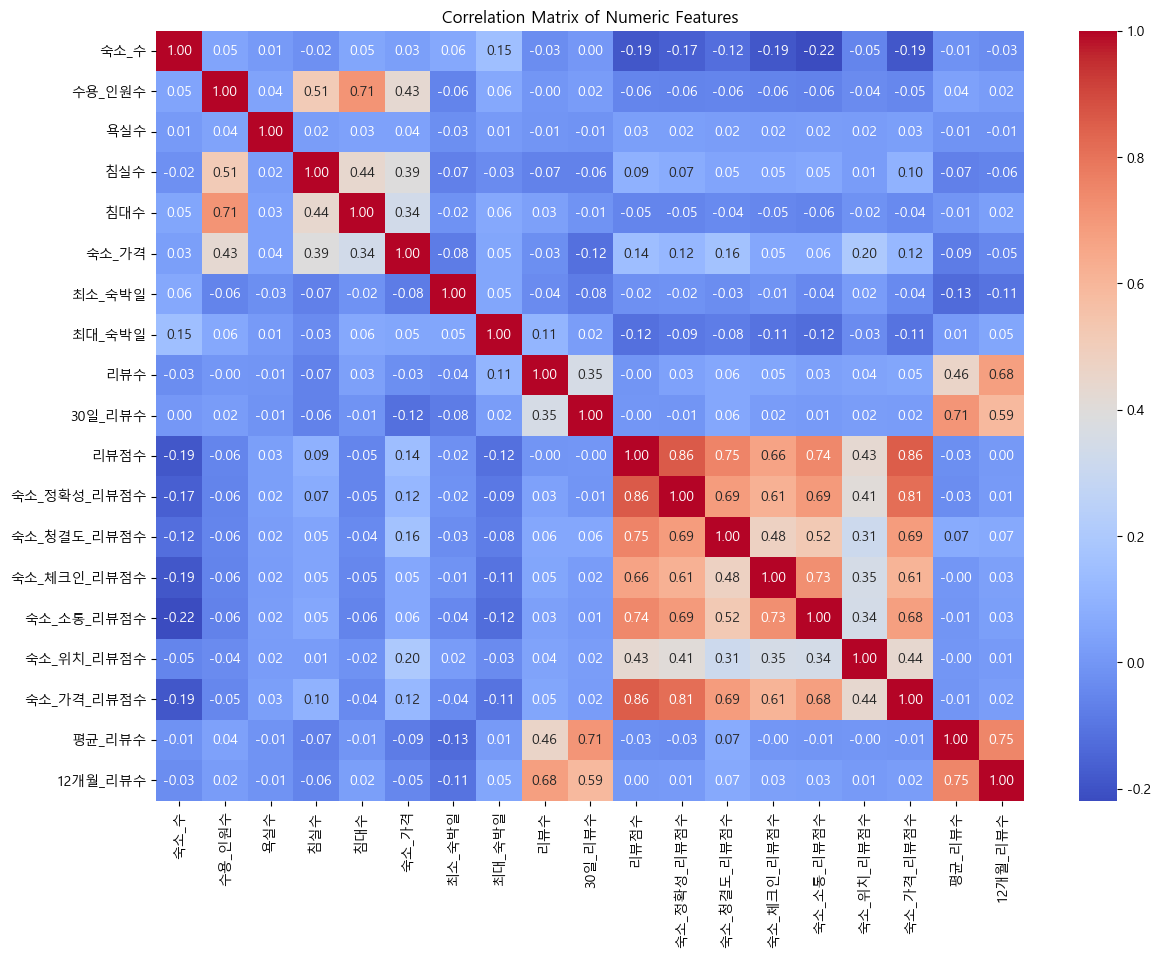

In [237]:
# 히트맵 
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
# plt.savefig('./heatmap.png', dpi=300)

plt.show()

# PCA 분석

In [238]:
df_clean.columns

Index(['숙소_수', '수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일',
       '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', '12개월_리뷰수'],
      dtype='object')

In [239]:
# df_reviews = df_clean[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
#        '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]

설명된 분산 비율 확인 및 Scree plot 그리기
 - 주성분 개수 찾기

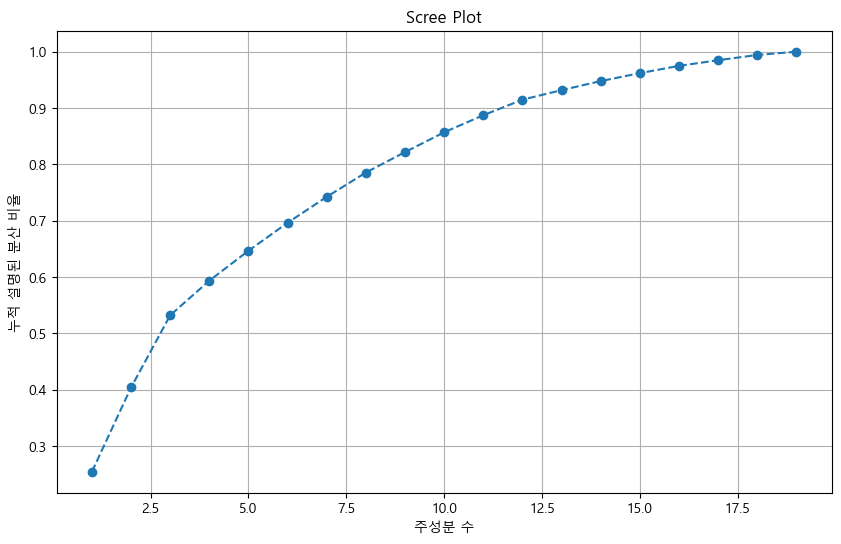

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# 결측값 처리 (필요시)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(df_clean.values)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA()
pca.fit(x_standardized)

# 설명된 분산 비율
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('주성분 수')
plt.ylabel('누적 설명된 분산 비율')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


결과 확인

70%가 넘어가는 주성분의 수 : 7

In [241]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

x = df_clean.drop(columns=['리뷰점수']).values
y = df_clean['리뷰점수'].values

# 결측값 처리 (필요시)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA(n_components=7)  # 주성분의 수
principal_components = pca.fit_transform(x_standardized)

# 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7'])

df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-0.354416,0.105911,-1.526509,0.277454,-0.250458,-0.136875,-0.459312
1,-0.052242,5.428204,-0.559187,1.644286,-0.171094,0.069397,-1.838385
2,0.774837,-0.976351,0.396183,-0.764462,-0.078786,0.078266,-0.195141
3,-0.657255,2.024032,2.182839,-0.102081,0.601016,1.212223,-0.377594
4,-0.392658,-0.586428,1.736380,0.791822,-0.050623,-0.175679,-0.877837


In [242]:
pca.explained_variance_ratio_

array([0.22098026, 0.15763346, 0.13529745, 0.064786  , 0.05608658,
       0.05240302, 0.04860134])

In [243]:
sum(pca.explained_variance_ratio_)

0.7357881180381963

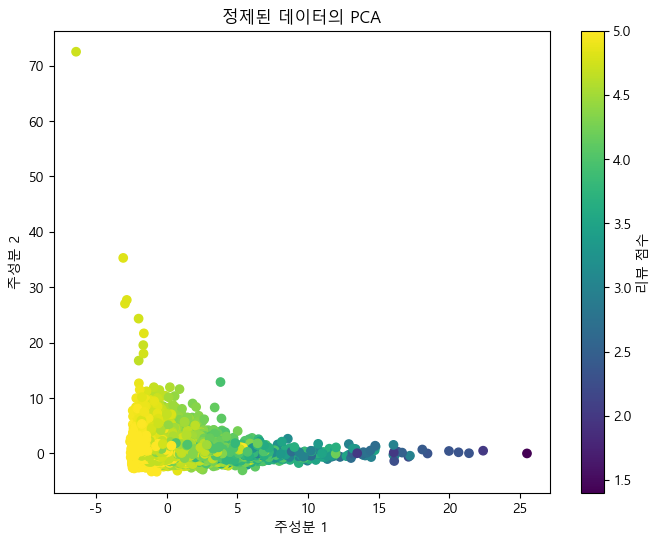

In [244]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=y, cmap='viridis')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('정제된 데이터의 PCA')
plt.colorbar(label='리뷰 점수')
plt.show()

K-means 클러스터링

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


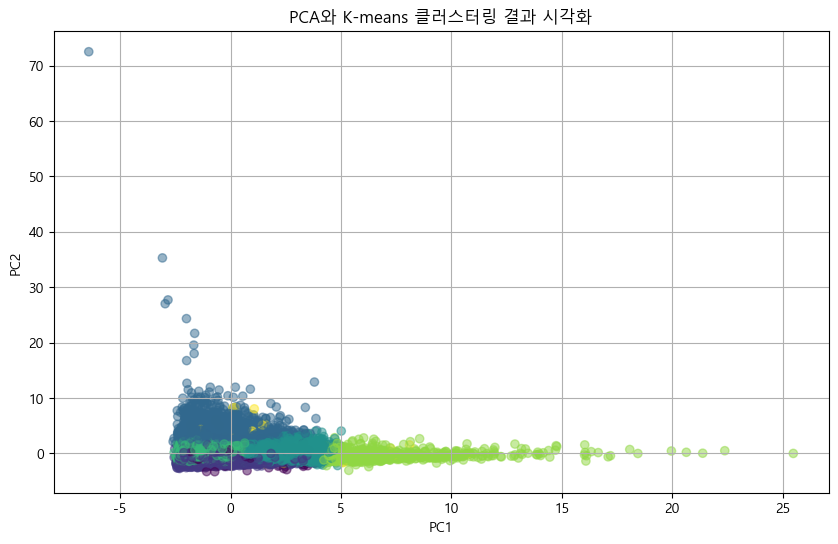

In [245]:
from sklearn.cluster import KMeans

# K-means 클러스터링
kmeans = KMeans(n_clusters=7, random_state=42) 
clusters = kmeans.fit_predict(df_pca)

# 클러스터 결과를 데이터프레임에 추가
df_pca['cluster'] = clusters

# 클러스터 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=df_pca['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA와 K-means 클러스터링 결과 시각화')
plt.grid(True)
plt.show()

In [246]:
# 클러스터 특성 파악
cluster_summary = df_clean.groupby(df_pca['cluster']).mean()
print(cluster_summary)

              숙소_수    수용_인원수       욕실수       침실수       침대수       숙소_가격  \
cluster                                                                  
0.0      14.023161  2.704360  0.993188  1.020436  1.463215  146.564033   
1.0      17.884651  2.743256  0.997209  1.007442  1.482791  145.112558   
2.0      17.109557  2.750583  0.994172  1.055944  1.445221  147.603730   
3.0      16.227986  2.776840  0.991556  0.990350  1.476478  149.937274   
4.0      22.489095  2.759542  0.992912  0.995638  1.470011  142.842421   
5.0      16.807692  2.861538  0.996154  0.984615  1.515385  147.023077   
6.0      12.765957  2.851064  0.989362  1.063830  1.468085  141.234043   

           최소_숙박일      최대_숙박일         리뷰수   30일_리뷰수      리뷰점수  숙소_정확성_리뷰점수  \
cluster                                                                      
0.0      7.023161  454.272480  110.574932  0.775204  4.756335     4.820381   
1.0      6.632558  484.974884  100.472558  0.765581  4.743907     4.808865   
2.0      5.745921  49

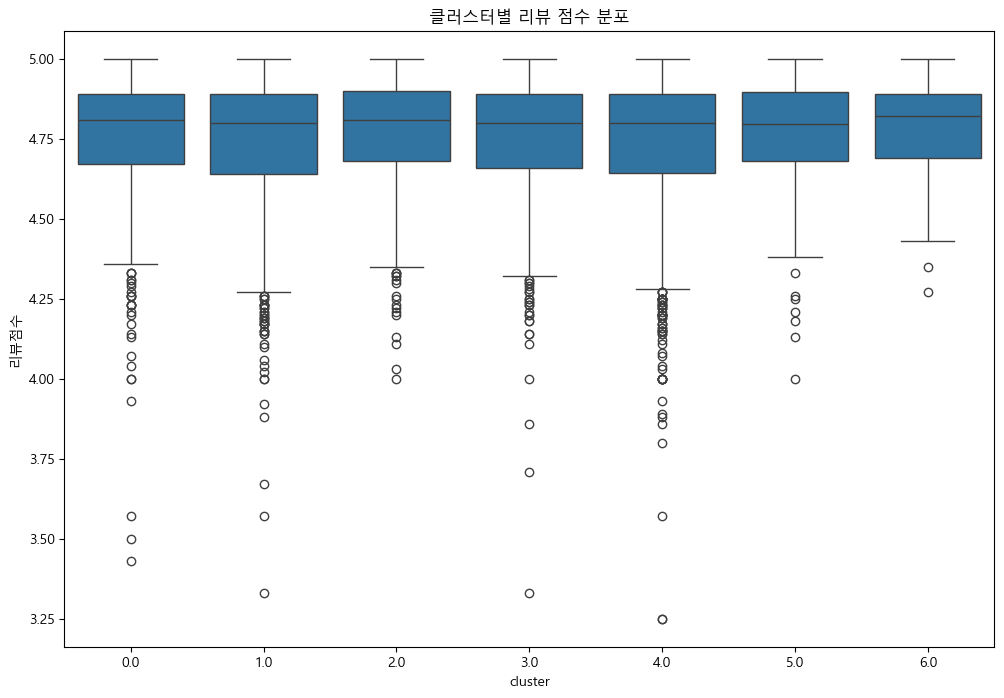

In [247]:
# 클러스터링 결과 시각화
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x=df_pca['cluster'], y=df_clean['리뷰점수'])
plt.title('클러스터별 리뷰 점수 분포')
plt.show()

In [248]:
#  모델 성능 평가
# 실루엣 점수 계산
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_pca[['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7']], df_pca['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2373825240538093


1에 가까운 값: 군집이 잘 형성되었다는 것을 의미합니다. 각 데이터 포인트가 잘 맞는 군집에 속해 있으며, 다른 군집과는 명확히 구분된다는 뜻입니다.

0에 가까운 값: 데이터 포인트가 경계에 위치해 있음을 의미합니다. 즉, 군집 간의 구분이 명확하지 않다는 뜻입니다.

-1에 가까운 값: 군집이 잘못 형성되었다는 것을 의미합니다. 데이터 포인트가 잘못된 군집에 속해 있어 다른 군집과 더 가깝다는 뜻입니다.


In [249]:
# # 추가적인 차원 축소 및 시각화
# # t-SNE 적용
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=7, random_state=42)
# tsne_results = tsne.fit_transform(x_standardized)

# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_pca['cluster'], cmap='viridis', alpha=0.5)
# plt.xlabel('t-SNE 1')
# plt.ylabel('t-SNE 2')
# plt.title('t-SNE 결과 시각화')
# plt.colorbar(label='클러스터')
# plt.show()


In [250]:
# 분류 모델 적용
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df_pca[['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7']], df_pca['cluster'], test_size=0.3, random_state=42)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       977
           1       0.97      0.97      0.97      1425
           2       0.96      0.97      0.97       613
           3       0.97      0.96      0.96      1158
           4       0.98      0.99      0.98      2493
           5       0.96      0.98      0.97       200
           6       0.98      0.91      0.94        44

    accuracy                           0.97      6910
   macro avg       0.97      0.96      0.97      6910
weighted avg       0.97      0.97      0.97      6910



In [251]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(df_clean)

# PCA 수행
pca = PCA(n_components=7)
principal_components = pca.fit_transform(x_standardized)

# 로딩 값 확인
loadings = pca.components_

# 로딩 값을 데이터프레임으로 변환
loading_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4','pc5','pc6','pc7'], index=df_clean.columns)
print(loading_df)

                  PC1       PC2       PC3       PC4       pc5       pc6  \
숙소_수         0.115779 -0.017269  0.042862  0.544010 -0.117724 -0.299675   
수용_인원수       0.029939 -0.071969  0.555287 -0.035560  0.056028  0.098390   
욕실수         -0.015196 -0.017344  0.045023  0.043037 -0.890300  0.446443   
침실수         -0.044565 -0.133559  0.450755 -0.144225  0.063707  0.031852   
침대수          0.027259 -0.071632  0.519440  0.002510  0.090340  0.170515   
숙소_가격       -0.075987 -0.132078  0.404516  0.107208 -0.056311 -0.221902   
최소_숙박일       0.021741 -0.081930 -0.092865  0.424664  0.404657  0.741658   
최대_숙박일       0.069979  0.040901  0.066039  0.629991 -0.081713 -0.179110   
리뷰수         -0.027609  0.422626  0.088774  0.132104  0.043171  0.093001   
30일_리뷰수     -0.014487  0.466059  0.071492 -0.036393  0.012177  0.019853   
리뷰점수        -0.427392 -0.031510 -0.005811  0.038909 -0.000359 -0.012326   
숙소_정확성_리뷰점수 -0.408071 -0.023373 -0.012720  0.064796  0.000335 -0.010962   
숙소_청결도_리뷰점수 -0.356941  0.

추출한 주성분으로 회귀분석

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
df_regression = pd.concat([df_pca, pd.DataFrame(y, columns=['리뷰점수'])], axis=1)

# 독립 변수와 종속 변수로 데이터를 나눔
X = df_regression[['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7']]
y = df_regression['리뷰점수']

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [253]:
# 모델 평가
y_pred = lr.predict(X_test)

In [254]:
y_pred

array([4.70697177, 4.39594648, 5.04654387, ..., 4.56215541, 4.92443942,
       4.87682603])

In [255]:
y_test

14273    4.69
13365    4.63
3213     5.00
16741    4.91
18911    4.86
         ... 
3728     4.89
21901    4.57
450      4.57
14522    4.95
2066     4.88
Name: 리뷰점수, Length: 4607, dtype: float64

In [256]:
# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE: %0.2f'%mse)   # 평균제곱오차
print('RMSE: %0.2f'%rmse) # 평균제곱근오차
print('MAE: %0.2f'%mae)   # 평균절대오차

MSE: 0.01
RMSE: 0.12
MAE: 0.08


In [257]:
r2 = round(r2_score(y_test, y_pred),2)
print('결정계수(r2_score):',r2)
# 결정계수(설명력): 회귀모델이 데이터에 83% 설명함

결정계수(r2_score): 0.83


In [258]:
print('y절편: ', np.round(lr.intercept_,2))

y절편:  4.73


In [259]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
X = df_regression[['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                 1.605e+04
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:28:31   Log-Likelihood:                 16318.
No. Observations:               23032   AIC:                        -3.262e+04
Df Residuals:                   23024   BIC:                        -3.256e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7291      0.001   6022.890      0.0

PCA 모델에서 누적된 분산 비율이 70~90% 범위인 경우 충분히 설명력이 있다고 판단할 수 있음
 - 이 경우 두 가지 선택권이 있음
 - - 데이터 특징의 90%를 살려 차원을 조금 늘릴지(여기서는 주성분 개수)
 - - 데이터 특징의 70%를 살려 차원을 최대한 축소할 지
 - 선택은 현재 시스템의 리소스 상황을 고려함

그래서 pc1과 pc2만으로 70% 가 넘어가므로 이 둘만 넣어서 회귀 분석 진행해봄

In [260]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택
X = df_regression[['pc1', 'pc2']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 5.497e+04
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:28:31   Log-Likelihood:                 16107.
No. Observations:               23032   AIC:                        -3.221e+04
Df Residuals:                   23029   BIC:                        -3.218e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7291      0.001   5968.499      0.0

전체 컬럼 중 범주형 제외 pca 분석

In [261]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23032 entries, 1 to 83158
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         23032 non-null  float64
 1   수용_인원수       23032 non-null  int64  
 2   욕실수          23032 non-null  float64
 3   침실수          23032 non-null  float64
 4   침대수          23032 non-null  float64
 5   숙소_가격        23032 non-null  float64
 6   최소_숙박일       23032 non-null  int64  
 7   최대_숙박일       23032 non-null  int64  
 8   리뷰수          23032 non-null  int64  
 9   30일_리뷰수      23032 non-null  int64  
 10  리뷰점수         23032 non-null  float64
 11  숙소_정확성_리뷰점수  23032 non-null  float64
 12  숙소_청결도_리뷰점수  23032 non-null  float64
 13  숙소_체크인_리뷰점수  23032 non-null  float64
 14  숙소_소통_리뷰점수   23032 non-null  float64
 15  숙소_위치_리뷰점수   23032 non-null  float64
 16  숙소_가격_리뷰점수   23032 non-null  float64
 17  평균_리뷰수       23032 non-null  float64
 18  12개월_리뷰수     23032 non-null  int64  
dtypes: float6

In [262]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 독립변인과 종속변인 설정
x = df_clean.drop(columns=['리뷰점수']).values  # 독립변인들의 값만 추출
y = df_clean['리뷰점수'].values  # 종속변인 추출

# 결측값 처리
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# 표준화
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_imputed)

# PCA 적용
pca = PCA(n_components=12)  # 주성분 개수
principal_components = pca.fit_transform(x_standardized)

# 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8',
                                                          'pc9','pc10','pc11','pc12'])
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,-0.354416,0.105909,-1.526505,0.277439,-0.250401,-0.136925,-0.459378,-0.982708,-0.699353,-0.848184,-0.704378,-0.536607
1,-0.052243,5.428213,-0.559203,1.644343,-0.171319,0.069590,-1.838133,-1.207752,-1.439093,-1.281282,-0.252252,0.110485
2,0.774836,-0.976350,0.396180,-0.764450,-0.078836,0.078310,-0.195082,-0.273591,-0.910996,-0.168214,0.323705,-0.774254
3,-0.657252,2.024012,2.182875,-0.102209,0.601524,1.211786,-0.378163,-0.724844,-2.075698,-1.490338,0.912050,1.382000
4,-0.392658,-0.586430,1.736385,0.791803,-0.050547,-0.175745,-0.877924,-1.084064,-0.616717,-0.182855,-0.465210,-0.448907
...,...,...,...,...,...,...,...,...,...,...,...,...
23027,-1.616390,0.540106,-0.734151,-0.119599,-0.260707,-0.389332,0.716339,-0.017857,1.302942,0.899857,-0.125468,0.642638
23028,-1.848821,2.635190,-0.717307,-0.803457,-0.164795,0.051403,0.990597,1.796171,2.163347,1.388049,0.291311,-0.046521
23029,-2.059088,1.466475,-1.638442,0.773763,-0.428228,-0.619083,-0.253290,0.831730,2.318569,0.967636,0.867150,0.737736
23030,-2.111463,0.129272,1.442088,-0.578113,0.138250,0.311628,0.670644,1.128837,1.647411,-0.032698,0.223627,1.476004


In [263]:
pca.explained_variance_ratio_

array([0.22098026, 0.15763346, 0.13529745, 0.064786  , 0.05608658,
       0.05240302, 0.04860135, 0.04499939, 0.03833051, 0.03662185,
       0.03177733, 0.02905604])

In [264]:
sum(pca.explained_variance_ratio_)
# 전체 컬럼 19개 중에 12개가 92%

0.9165732414438674

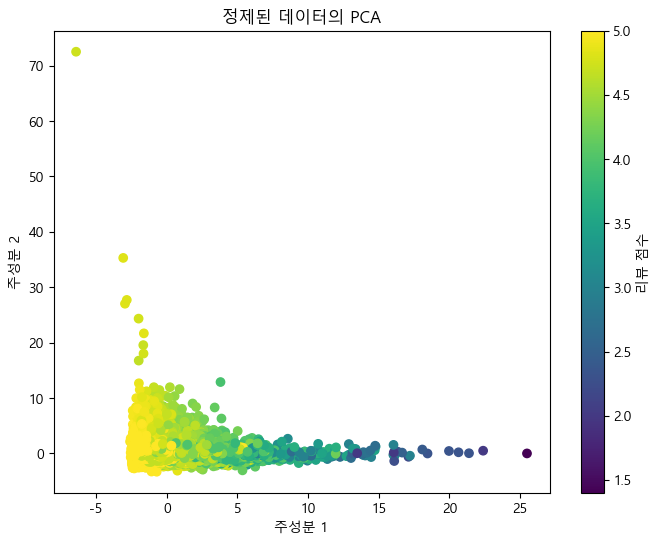

In [265]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=y, cmap='viridis')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('정제된 데이터의 PCA')
plt.colorbar(label='리뷰 점수')
plt.show()

추출한 주성분으로 회귀분석

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 주성분과 종속 변수를 포함한 데이터프레임 생성
df_regression = pd.concat([df_pca, pd.DataFrame(y, columns=['리뷰점수'])], axis=1)

# 독립 변수와 종속 변수로 데이터를 나눔
X = df_pca.values  # 주성분들의 값만 추출
y = df_regression['리뷰점수'].values  # 종속변인 추출

# 학습용과 테스트용으로 데이터를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀분석 모델을 만들고 학습
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [267]:
# 모델 평가
y_pred = lr.predict(X_test)

In [268]:
y_pred

array([4.73941583, 4.37985606, 5.00354715, ..., 4.57925004, 4.91969206,
       4.90026992])

In [269]:
y_test

array([4.69, 4.63, 5.  , ..., 4.57, 4.95, 4.88])

In [270]:
# 회귀분석 평가 지표 (mse, rmse, mae / 결정계수 r2_score)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE: %0.2f'%mse)   # 평균제곱오차
print('RMSE: %0.2f'%rmse) # 평균제곱근오차
print('MAE: %0.2f'%mae)   # 평균절대오차

MSE: 0.01
RMSE: 0.11
MAE: 0.07


In [271]:
r2 = round(r2_score(y_test, y_pred),2)
print('결정계수(r2_score):',r2)
# 결정계수(설명력): 회귀모델이 데이터에 83% 설명함

결정계수(r2_score): 0.85


In [272]:
print('y절편: ', np.round(lr.intercept_,2))

y절편:  4.73


In [273]:
import statsmodels.api as sm

# 종속변수와 독립변수 선택

X = df_pca[['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']]
y = df_regression['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.124e+04
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:28:32   Log-Likelihood:                 18089.
No. Observations:               23032   AIC:                        -3.615e+04
Df Residuals:                   23019   BIC:                        -3.605e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7291      0.001   6503.629      0.0

리뷰 점수와 상관계수가 있는 6개의 컬럼으로 pca분석을 돌린 주성분 4개의 회귀모델 R-squared = 0.854
 - 주성분 4개 이유 : 4개 넣어야. 90%를 넘겼음.
 - [0.64872037, 0.12489846, 0.10042543, 0.05315938]
<br>

전체 데이터(범주형 데이터 제외한 df) 19개 중 pca분석을 통해 나온 주성분 12개의 회귀모델 R-squared = 0.854
 - 주성분 12개 이유 : 12개 넣어야. 90%를 넘겼음.
 - [0.22076125, 0.16796894, 0.15590424, 0.06378205, 0.05295055, 0.05225754, 0.04827873, 0.04056497, 0.03816209, 0.03280494, 0.02871818, 0.01855913]

결과 : 
- 두 경우의 R-squared 가 똑같음.
- 다만 둘 다 90을 넘지 못하였음.

# 공통 요인 분석 진행

In [274]:
!pip install factor-analyzer

Defaulting to user installation because normal site-packages is not writeable


In [275]:
# 필요한 라이브러리 불러오기
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [276]:
# 요인 분석 수행
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df_clean) 

# 결과 출력
print(fa.loadings_)


[[-0.21039566 -0.02323694]
 [-0.05557631 -0.02316217]
 [ 0.02797012 -0.01493785]
 [ 0.0842277  -0.10700221]
 [-0.04998761 -0.02808993]
 [ 0.14107915 -0.10963893]
 [-0.03499969 -0.11011164]
 [-0.12782453  0.04973058]
 [ 0.03519004  0.60881442]
 [ 0.00736453  0.70093527]
 [ 0.95801017 -0.02391877]
 [ 0.89071543 -0.012506  ]
 [ 0.73617071  0.06359737]
 [ 0.72368322  0.01954466]
 [ 0.79536644  0.01120635]
 [ 0.45824232  0.00752385]
 [ 0.89218132  0.00897611]
 [-0.01230923  0.86016273]
 [ 0.02124518  0.9120532 ]]


In [277]:
import pandas as pd

# 결과를 df로 변환 
loadings_df = pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2'])
loadings_df

,Factor1,Factor2
0,-0.210396,-0.023237
1,-0.055576,-0.023162
2,0.027970,-0.014938
3,0.084228,-0.107002
4,-0.049988,-0.028090
5,0.141079,-0.109639
6,-0.035000,-0.110112
7,-0.127825,0.049731
8,0.035190,0.608814
9,0.007365,0.700935


In [278]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23032 entries, 1 to 83158
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         23032 non-null  float64
 1   수용_인원수       23032 non-null  int64  
 2   욕실수          23032 non-null  float64
 3   침실수          23032 non-null  float64
 4   침대수          23032 non-null  float64
 5   숙소_가격        23032 non-null  float64
 6   최소_숙박일       23032 non-null  int64  
 7   최대_숙박일       23032 non-null  int64  
 8   리뷰수          23032 non-null  int64  
 9   30일_리뷰수      23032 non-null  int64  
 10  리뷰점수         23032 non-null  float64
 11  숙소_정확성_리뷰점수  23032 non-null  float64
 12  숙소_청결도_리뷰점수  23032 non-null  float64
 13  숙소_체크인_리뷰점수  23032 non-null  float64
 14  숙소_소통_리뷰점수   23032 non-null  float64
 15  숙소_위치_리뷰점수   23032 non-null  float64
 16  숙소_가격_리뷰점수   23032 non-null  float64
 17  평균_리뷰수       23032 non-null  float64
 18  12개월_리뷰수     23032 non-null  int64  
dtypes: float6

In [279]:
loadings_df[loadings_df['Factor1'] >= 0.6]

,Factor1,Factor2
10,0.958010,-0.023919
11,0.890715,-0.012506
12,0.736171,0.063597
13,0.723683,0.019545
14,0.795366,0.011206
16,0.892181,0.008976


Factor1에서 높은 유사성을 나타낸 값들<br>
10  리뷰점수<br>
11  숙소_정확성_리뷰점수<br>
12  숙소_청결도_리뷰점수<br>
13  숙소_체크인_리뷰점수<br>
14  숙소_소통_리뷰점수<br>
16  숙소_가격_리뷰점수<br>
리뷰점수 + 리뷰 상세 항목들(위치항목 제외)

해당 결과는 서로 유사한 변수들을 묶어서 Factor1 라는 잠재 변수를 생성한 것임.

In [280]:
loadings_df[loadings_df['Factor2'] >= 0.6]

,Factor1,Factor2
8,0.035190,0.608814
9,0.007365,0.700935
17,-0.012309,0.860163
18,0.021245,0.912053


Factor2에서 높은 유사성을 나타낸 값들<br>
1   수용_인원수<br>
2   욕실수<br>
3   침실수<br>
4   침대수<br>

해당 결과는 서로 유사한 변수들을 묶어서 Factor2 라는 잠재 변수를 생성한 것임.

확인 결과 : 
 - 상관관계에서 나타났던 값들끼리 나왔음.
 - 결과를 보니 요인 분석 중 공통요인분석을 진행한 것 같음.
 - - ② 공통요인분석(common factor analysis) : 원래 변수들의 토대가 되는 잠재차원들을 찾아내고, 분산의 구성에 대한 사전지식이 별로 없는 경우에 적절합니다.

잘못된 부분이 있을 것 같아 새로 시작(회귀분석 과정에서 실패 이후)

먼저 모든 가능한 요인 수(n_factors=df_clean.shape[1])로 초기 공통요인 분석을 실행하여 각 요인의 고유값을 계산
 - 유값은 요인이 데이터 집합의 변동성을 얼마나 잘 설명하는지를 나타냄

In [281]:
# 필요한 라이브러리를 임포트합니다.
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# FactorAnalyzer 초기화
fa = FactorAnalyzer(rotation=None, n_factors=df_clean.shape[1], method='principal')
fa.fit(df_clean)

# 고유값(Eigenvalues) 확인
ev, v = fa.get_eigenvalues()
print(ev)

[4.83159    2.84208485 2.4354753  1.16811889 1.00955858 0.94339872
 0.87552033 0.81883212 0.69023387 0.6681218  0.57521106 0.52479799
 0.3213084  0.30593589 0.26723691 0.24568007 0.1910574  0.17717269
 0.10866512]


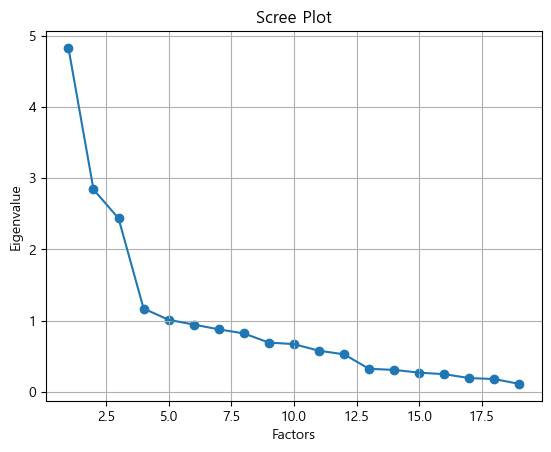

In [282]:
# 스크리 플롯으로 요인 수 결정
plt.scatter(range(1, df_clean.shape[1]+1), ev)
plt.plot(range(1, df_clean.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

고유값이 1 이상인 요인들은 데이터 집합의 중요한 변동성을 설명한다고 할 수 있으므로, 이를 기준으로 요인 수를 결정
 - 일반적으로 고유값이 1 이상인 요인을 선택
 - 마지막으로, 결정된 요인 수로 요인 분석을 재실행하고, 요인 회전(rotation="varimax")을 적용하여 요인의 해석을 용이하게 함

In [283]:
# 요인 수 결정 (예: 고유값이 1 이상인 요인 수)
n_factors = sum(ev > 1)

# 요인 분석 재실행, 이번에는 요인 수 지정
fa = FactorAnalyzer(rotation="varimax", n_factors=n_factors)
fa.fit(df_clean)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

요인 부하량 확인하기<br>
요인 부하량은 각 변수가 요인에 어떻게 연관되어 있는지를 보여줍니다. 높은 절대값을 가진 부하량은 해당 변수가 요인과 강하게 연관되어 있음을 의미합니다.

In [284]:
# 요인 부하량 확인
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=df_clean.columns))

                    0         1         2         3         4
숙소_수        -0.140240 -0.026023  0.030086 -0.008616 -0.252618
수용_인원수      -0.125786  0.105570  0.887415  0.000805  0.009381
욕실수          0.028876 -0.007975  0.050234 -0.003029 -0.007151
침실수          0.045560 -0.013417  0.612900 -0.054193  0.041732
침대수         -0.101901  0.047989  0.744574  0.062592 -0.005394
숙소_가격        0.171991 -0.065170  0.535304  0.006776 -0.133008
최소_숙박일      -0.014287 -0.145064 -0.069302  0.022263 -0.051700
최대_숙박일      -0.071754 -0.010481  0.042989  0.135591 -0.197149
리뷰수          0.062954  0.387427 -0.040772  0.776712 -0.067838
30일_리뷰수      0.006726  0.733108 -0.079533  0.091632 -0.003807
리뷰점수         0.935741  0.007130  0.057873 -0.062185  0.204571
숙소_정확성_리뷰점수  0.872121 -0.011083  0.040636 -0.003305  0.184971
숙소_청결도_리뷰점수  0.777838  0.085694  0.039703 -0.038556  0.011898
숙소_체크인_리뷰점수  0.612901  0.004105  0.012253  0.063635  0.488333
숙소_소통_리뷰점수   0.670600  0.008490  0.015663  0.041397  0.575989
숙소_위치_리뷰

0.6 이상으로 묶어보면<br>

0 : 리뷰점수, 정확성, 청결고, 체크인, 소통, 가격_리뷰점수<br>
1 : 수용인원수, 욕실수, 침실수, 침대수<br>
2 : 30일리뷰수, 평균리뷰수, 12개월리뷰수<br>
3 : 리뷰수

요인 점수 계산하기<br>
요인 점수는 관측된 변수들의 값으로부터 각 요인에 대한 개별 관측치(예: 사람, 경우 등)의 점수를 계산합니다. 이 점수는 후속 분석에서 사용될 수 있습니다.

In [285]:
# 요인 점수 계산
factor_scores = fa.transform(df_clean)
print(factor_scores)

[[ 0.04833665 -0.7252528  -0.74823749  1.05483668  0.14941845]
 [-0.07334694  0.41653426 -0.94784975  4.50158727 -0.3681178 ]
 [-0.55987522 -0.76995953  0.62877655  0.48985208  0.30291395]
 ...
 [ 1.02290377  1.47188841 -1.01847258 -1.57019166  0.09070377]
 [ 0.77549975  1.04920294  0.9625734  -1.28339546  0.48249767]
 [-1.70405156  1.07995896  2.3171074  -0.95925605  1.01938831]]


회귀 모델 분석
 - 리뷰점수

In [286]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(factor_scores)  # 독립 변수
y = df['리뷰점수']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.236e+05
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:28:40   Log-Likelihood:                 34218.
No. Observations:               23032   AIC:                        -6.842e+04
Df Residuals:                   23026   BIC:                        -6.838e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7291      0.000   1.31e+04      0.0

요인 분석 결론 :
 - PCA 분석 결과를 회귀 모델에 넣었을 경우 : R-squared : 0.854
 - 공통요인분석 결과를 회귀 모델에 넣었을 경우 : R-squared : 0.954

공통요인 분석 결과가 훨씬 좋게 나왔고, 90%를 넘었기에 채택가능

회귀 모델 분석
 - 숙소_가격

In [287]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(factor_scores)  # 독립 변수
y = df['숙소_가격']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  숙소_가격   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     3228.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:28:40   Log-Likelihood:            -1.2484e+05
No. Observations:               23032   AIC:                         2.497e+05
Df Residuals:                   23026   BIC:                         2.497e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.2857      0.360    400.475      0.0

숙소_가격에 대해서는 설명력이 매우 떨어짐